# <center> <h1><font color='blue'> Applying K-Means </font></h1></center>

In [2]:
import matplotlib.pyplot as plt                   # For Plotting graph
import pandas as pd                               # For using functions for data cleaning 
import seaborn as sns                             # For plotting graphs
from sklearn.cluster import KMeans                # To use KMeans Clusturing algorithm
from sklearn.preprocessing import MinMaxScaler    # To use MinMaxScaler to scale the dataset
import warnings                                   # To ignore warning in the program
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('income.csv')      # Reading income csv file
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [4]:
df.info()    # Information of the data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
Name         22 non-null object
Age          22 non-null int64
Income($)    22 non-null int64
dtypes: int64(2), object(1)
memory usage: 608.0+ bytes


In [5]:
df.isnull().sum()    # Checking for null values

Name         0
Age          0
Income($)    0
dtype: int64

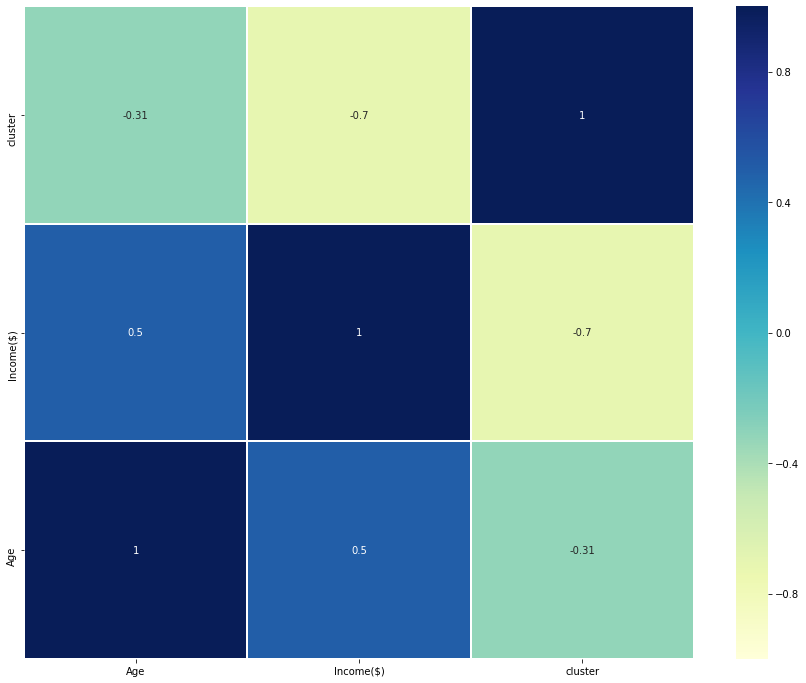

In [41]:
data_c = df.corr()   # Correlation of featurs.
fig, axes = plt.subplots(figsize=(15,12))   # Setting the figure size.
ax = sns.heatmap(data_c, vmin = -1, vmax = 1, annot = True, ax = axes, cmap="YlGnBu", linewidth=0.9) 
#plotting heat map with min to max range is -1 to 1.
ax.set_xlim(0,3)  # Setting xlimit to 10.
ax.set_ylim(0,3)  # Setting ylimit to 10.
plt.show()

From the above plot we can say that:
* 'Income' and 'Cluster' have highest correlation of 0.7.
* 'Age' and 'cluster' have lowest correlation of -0.31.

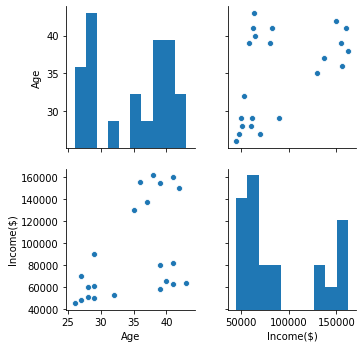

In [6]:
sns.pairplot(df)    # PairdPlot between the columns of the data frame

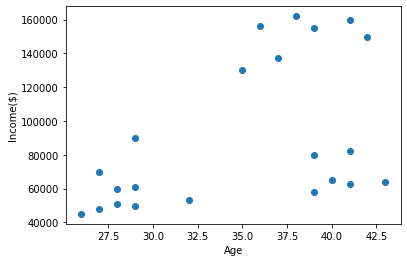

In [7]:
plt.scatter(df.Age,df['Income($)'])    # Scatter plot between Age and Income columns
plt.xlabel('Age')                      # X-label of the graph
plt.ylabel('Income($)')                # Y-label of the graph
plt.show()                             # For showing the graph

In [32]:
# Sum of Squared errors 
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df1[['Age','Income($)']])
    sse.append(km.inertia_)

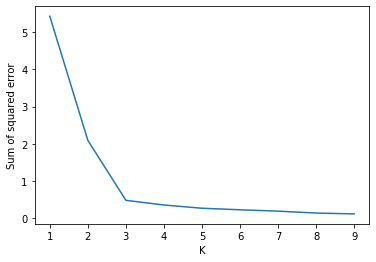

In [42]:
# Plotting Sum of squared error

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)
plt.show()

From the above plot we can say that:
* The sum of squared errors is decreasing after k=3.
so, we will use 3 clusters.

In [9]:
km = KMeans(n_clusters=3)                       # Applying KMeans clustering in the data frame taking random clusters. 
y_predicted = km.fit_predict(df[['Age','Income($)']])       # Predicting the values 
y_predicted     # Printing the values

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [10]:
df['cluster'] = y_predicted
df.head(10)      # Adding a column named cluster which contains predicted values

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0
5,Gautam,39,155000,0
6,David,41,160000,0
7,Andrea,38,162000,0
8,Brad,36,156000,0
9,Angelina,35,130000,0


In [39]:
df[df["cluster"]==1]

,Name,Age,Income($),cluster
2,Mohan,29,61000,1
3,Ismail,28,60000,1
11,Tom,26,45000,1
12,Arnold,27,48000,1
13,Jared,28,51000,1
14,Stark,29,49500,1
15,Ranbir,32,53000,1
16,Dipika,40,65000,1
17,Priyanka,41,63000,1
18,Nick,43,64000,1


In [11]:
km.cluster_centers_     # Centroid values of the classes

array([[3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04],
       [3.40000000e+01, 8.05000000e+04]])

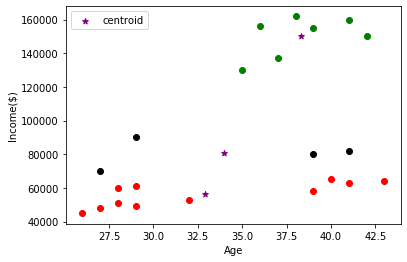

In [12]:
df21 = df[df.cluster==0]     # Making a data frame with cluster = 0
df22 = df[df.cluster==1]     # Making a data frame with cluster = 1
df23 = df[df.cluster==2]     # Making a data frame with cluster = 2
plt.scatter(df21.Age,df21['Income($)'],color='green')      # Plotting graph between Age and Income of dataframe df21
plt.scatter(df22.Age,df22['Income($)'],color='red')        # Plotting graph between Age and Income of dataframe df22
plt.scatter(df23.Age,df23['Income($)'],color='black')      # Plotting graph between Age and Income of dataframe df23
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
# Plotting the centroid of the dataframes.
plt.xlabel('Age')    # X-Label of the graph
plt.ylabel('Income($)')   # Y-Label of the graph
plt.legend()      # 
plt.show()       # Shoeing the graph

* Here, we can say that we need to scale the data because the centroids of some clusters are lying outside and also, there are some outliers in the data.
So, we need to first scale the data and deal with outliers.

<center> <h1><font color='skyblue'> Using MinMax Scaler on  K-Means </font></h1></center>

In [13]:
df1 = pd.read_csv('Income.csv')
df1     # Reading a csv file

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [18]:
# Min max scaler
scaler = MinMaxScaler()
scaler.fit(df1[['Income($)']])
df1['Income($)'] = scaler.transform(df1[['Income($)']])    # Scaling the data

scaler.fit(df1[['Age']])
df1['Age'] = scaler.transform(df1[['Age']])    # Scaling the data
df1.head(10)    

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436
5,Gautam,0.764706,0.940171
6,David,0.882353,0.982906
7,Andrea,0.705882,1.000000
8,Brad,0.588235,0.948718
9,Angelina,0.529412,0.726496


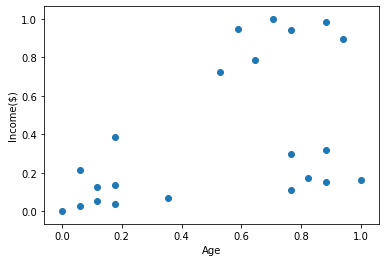

In [20]:
# Scatter plot between 'Age' and "Income" column.

plt.scatter(df1.Age,df1['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.show()

In [27]:
# Applying k-means with 3 clusters.

km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df1[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [28]:
df1['cluster'] = y_predicted
df1.head(10)

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [29]:
km.cluster_centers_   # Centroids of the clusters.

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

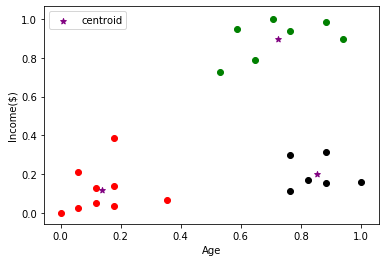

In [30]:
# Scatter plot of 'Age' and 'Income' column with centroids of each cluster

df21 = df1[df1.cluster==0]
df22 = df1[df1.cluster==1]
df23 = df1[df1.cluster==2]
plt.scatter(df21.Age,df21['Income($)'],color='green')
plt.scatter(df22.Age,df22['Income($)'],color='red')
plt.scatter(df23.Age,df23['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()
plt.show()

# Conclusion:
* All the centroids lies in between all the clusters.

***